In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [5]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os;
df=pd.read_csv('/Users/vineethpetnakota/downloads/instagram_data.csv')
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [7]:
df.shape

(11692, 14)

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

In [9]:
df.isnull().sum()

owner_id              0
owner_username        2
shortcode             2
is_video              2
caption             161
comments              2
likes                 2
created_at            3
location           7169
imageUrl              3
multiple_images       3
username           2115
followers          2115
following          2115
dtype: int64

In [10]:
df.dtypes

owner_id            object
owner_username      object
shortcode           object
is_video            object
caption             object
comments            object
likes               object
created_at         float64
location            object
imageUrl            object
multiple_images     object
username            object
followers          float64
following          float64
dtype: object

In [11]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


# data preprocessing

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [15]:
import nltk
nltk.download('omw-1.4')


df['caption'] = df['caption'].astype(str).apply(preprocess_text)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/vineethpetnakota/nltk_data...


In [16]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,im brunch iced coffee girlie top ta3 x nazanin...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,brow tip really wish would know first started ...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,omg cant believe already 1 yr since launching ...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90 glam pam makeup smashboxcosmetics og primer...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,chiseled sculptured contour westmanatelier fac...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [17]:
from transformers import pipeline
import pandas as pd

# Load a pre-trained model for emotion detection
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', return_all_scores=True)

# Function to analyze emotions in captions
def analyze_emotions(caption):
    result = emotion_classifier(caption, padding=True, truncation=True, max_length=128)  # Adjust max_length as needed
    if isinstance(result, list) and result:
        # Extract the emotion label with the highest score
        top_emotion = max(result[0], key=lambda x: x['score'])
        return top_emotion['label']
    else:
        return 'unknown'

# Apply the function to the 'caption' column and create a new column for emotions
df['emotion'] = df['caption'].apply(lambda x: analyze_emotions(str(x)))

# Display the updated DataFrame
df.head(30)


/Users/vineethpetnakota/opt/anaconda3/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,emotion
0,36063641,christendominique,C3_GS1ASeWI,False,im brunch iced coffee girlie top ta3 x nazanin...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,joy
1,36063641,christendominique,C38ivgNS3IX,True,brow tip really wish would know first started ...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,neutral
2,36063641,christendominique,C35-Dd9SO1b,True,omg cant believe already 1 yr since launching ...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
3,36063641,christendominique,C33TadDMisq,True,90 glam pam makeup smashboxcosmetics og primer...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
4,36063641,christendominique,C3s-Cm1yCba,True,chiseled sculptured contour westmanatelier fac...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,neutral


In [20]:
df.head(30)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following,emotion
0,36063641,christendominique,C3_GS1ASeWI,False,im brunch iced coffee girlie top ta3 x nazanin...,268,16382,1.709327e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,joy
1,36063641,christendominique,C38ivgNS3IX,True,brow tip really wish would know first started ...,138,9267,1.709241e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,neutral
2,36063641,christendominique,C35-Dd9SO1b,True,omg cant believe already 1 yr since launching ...,1089,10100,1.709155e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
3,36063641,christendominique,C33TadDMisq,True,90 glam pam makeup smashboxcosmetics og primer...,271,6943,1.709065e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
4,36063641,christendominique,C3s-Cm1yCba,True,chiseled sculptured contour westmanatelier fac...,145,17158,1.708718e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,neutral
5,36063641,christendominique,C3n0pZJvG-G,True,foundation coverage love flawless came conceal...,143,9683,1.708546e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
6,36063641,christendominique,C3YegR2SGDY,True,prettiest eye brown makeup dominiquecosmetics ...,356,42906,1.708031e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,neutral
7,36063641,christendominique,C3VvPxmPUDN,True,cozy pink girl night makeup cute using tooface...,132,4287,1.707939e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy
8,36063641,christendominique,C3TRBGfSJyD,True,girl girl always grwm makeup makeuptutorial gi...,128,7484,1.707856e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,anger
9,36063641,christendominique,C3BLzaOvkWJ,True,thing ive learned 30 makeup ienvylashes_offici...,884,48528,1.707250e+09,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0,joy


# Visualization

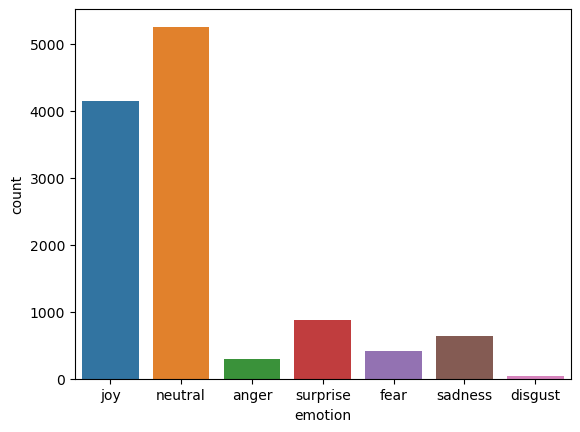

In [18]:
sns.countplot(x=df['emotion']); #representation of plot using bar graph

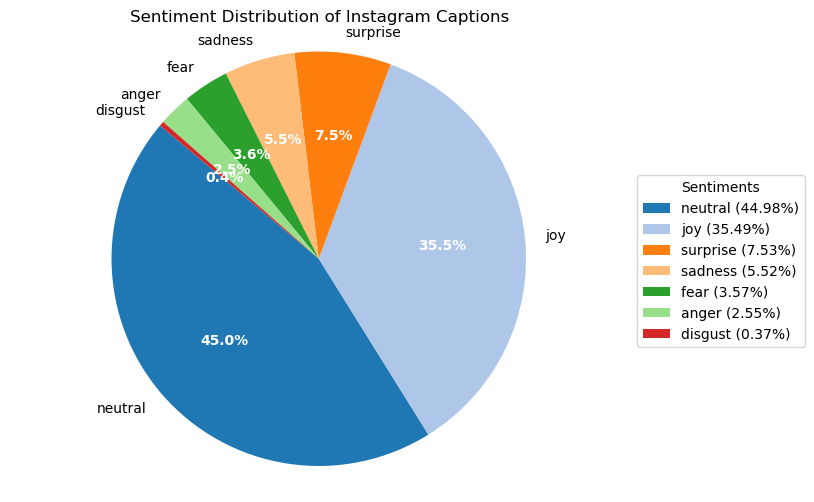

In [23]:
import matplotlib.pyplot as plt

# Count the number of captions for each sentiment category
sentiment_counts = df['emotion'].value_counts()

# Calculate the percentage of each sentiment
percentages = (sentiment_counts / sentiment_counts.sum()) * 100
labels_with_percentages = [f'{sentiment} ({percentage:.2f}%)' for sentiment, percentage in zip(sentiment_counts.index, percentages)]
labels_without_percentages = [f'{sentiment}' for sentiment in sentiment_counts.index]

# Plot the pie chart with emotion names as labels
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sentiment_counts, labels=labels_without_percentages, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Customize the autotexts (percentages on the slices)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Add a legend with percentages
plt.legend(wedges, labels_with_percentages, title="Sentiments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title and make sure pie chart is a circle
plt.title('Sentiment Distribution of Instagram Captions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
